# PCA(主成分分析: Principal Component Analysis)
- 高次元から低次元へと変換するアルゴリズム
- 変換して低次元にするため、全ての特徴量が必要
- なのでLassoの様な特徴量選択としての用途は限定的

分散共分散行列Sの固有ベクトルuを求めれば良い

主成分(principal)
- データを最もよく表している軸
- データが最も分散している軸
- データから軸の距離の合計が最も小さくなる軸
- 射影後の分散が最も大きくなる軸

## PCAの注意点
- 基本的な目的は可視化と高速化
- 過学習を避けること(=精度の向上)が目的であれば、Lassoなどの特徴量を選択するアルゴリズムの方が一概に良い
- 次元が削減されても解釈性は向上しない
- PCAをしても必要な特徴量は減らない(データ取得のコストは下がらない)

## PCAの手順

Xと主成分の数（圧縮後の次元数）を引数にしてPCA後のXを返す関数を作成

1. 平均0, 標準偏差1に標準化
2. Xの分散共分散行列を計算
3. 固有ベクトルと固有値を求める（大きい順に第一主成分, 第二主成分...と並べる）
4. 主成分にXを変換

## PCA from scratch

### データの準備

In [40]:
import numpy as np
import pandas as pd
# サンプルデータ準備
x = np.array([3, 4, 2, 3, 4, 4, 3])
y = np.array([2, 3, 5, 5, 3, 2, 3])
X = pd.DataFrame({"x": x, "y": y})
X


,x,y
0,3,2
1,4,3
2,2,5
3,3,5
4,4,3
5,4,2
6,3,3


### 完成形

In [42]:
import numpy as np
import pandas as pd
def my_pca(X, num_components):
    # step1. 標準化
    X_meaned = X - np.mean(X, axis=0)
    X_scaled = X_meaned / np.std(X_meaned, axis=0)
    
    # step2. 分散共分散行列
    cov_mat = np.cov(X_scaled, rowvar=False)
    
    # step3. 固有ベクトルと固有値
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_evalues = eigen_values[sorted_index]
    sorted_evectors = eigen_vectors[:, sorted_index]
    subset_evectors = sorted_evectors[:, :num_components]
    
    # step4. 変換
    X_reduced = np.dot(X_scaled, subset_evectors)
    
    return X_reduced


my_pca(X, 1)


array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

### ステップ1 標準化

X_scaledの作成

xとyそれぞれで標準化したいため、axis=0にする。

In [3]:
X_meaned = X - np.mean(X, axis=0)
X_scaled = X_meaned / np.std(X_meaned, axis=0)
X_scaled

,x,y
0,-0.408248,-1.107823
1,1.020621,-0.246183
2,-1.837117,1.477098
3,-0.408248,1.477098
4,1.020621,-0.246183
5,1.020621,-1.107823
6,-0.408248,-0.246183


### ステップ2 分散共分散行列

cov_matの作成

今回、それぞれの特徴量を表しているのは列なので、rowvar=Falseにする。

In [5]:
cov_mat = np.cov(X_scaled, rowvar=False)
cov_mat

array([[ 1.16666667, -0.73284007],
       [-0.73284007,  1.16666667]])

### ステップ3 固有ベクトルと固有値
1. eigen_values, eigen_vectorsの作成
2. eigen_valuesを大きい順に並べ替え、その順番でeigen_vectorsも並べ替える
3. subset_evectorsの作成

2において、np.linalg.eigh()のdocstringを見るとeigen_vectorsはカラムごとに固有ベクトルが入ってることがわかるので、ソートは列で行う必要がある。

In [28]:
# 1. eigen_values, eigen_vectorsの作成
# 固有値と、固有ベクトルを返す
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
eigen_values, eigen_vectors

(array([0.43382659, 1.89950674]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [44]:
# 2. eigen_valuesを大きい順に並べ替え、その順番でeigen_vectorsも並べ替える
# 大きい順に並べた時のインデックス
sorted_index = np.argsort(eigen_values)[::-1]
# 固有値と固有ベクトルを並び替え
sorted_evalues = eigen_values[sorted_index]
# これは列でソート
sorted_evectors = eigen_vectors[:, sorted_index]

sorted_evalues, sorted_evectors

(array([1.89950674, 0.43382659]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

上のeigen_values, eigen_vectorsと比べると、ちゃんと列でソートされていることがわかる。

実際に必要なのはnum_componentsの数だけなので、上からこの数だけ持ってくる。この際も、列を持ってくることに気をつける。



In [29]:
# 3. subset_evectorsの作成
# 今は仮に2と置く。
num_components = 2
subset_evectors = sorted_evectors[:, :num_components]
subset_evectors

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

### ステップ4 主成分にXを変換
X_reducedの作成

標準化されたXに対して求めた行列をかけることで、主成分の座標系に変換できる。

In [31]:
X_reduced = np.dot(X_scaled, subset_evectors)
X_reduced

array([[-0.49467432,  1.07202459],
       [-0.89576549, -0.54761018],
       [ 2.34350404,  0.25457217],
       [ 1.33314107, -0.7557908 ],
       [-0.89576549, -0.54761018],
       [-1.50503729,  0.06166162],
       [ 0.11459748,  0.46275279]])

今回はnum_componentsを2にしているので、次元圧縮はされていない。

そして、PCA from scratchの最初に記した完成形へ。

試しに動かしてみる。

In [34]:
my_pca(X, 1)

array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

実際はsklearn.decomposition.PCAを使うので1から作ることはないが、PCAの流れに関しての理解が深まったはず。

## sklearnのPCA
sklearn.decomposition.PCA
1. PCA(n_components)でインスタンス作成
    - n_components引数には使用する主成分の数を指定
2. .fit(X)でXの主成分を計算
3. .transform(X)でXを主成分の座標系に変換

事前に標準化する必要があることに注意

### データの準備(前節と同じデータ)

In [37]:
import numpy as np
import pandas as pd
# サンプルデータ準備
x = np.array([3, 4, 2, 3, 4, 4, 3])
y = np.array([2, 3, 5, 5, 3, 2, 3])
X = pd.DataFrame({"x": x, "y": y})

### 完成形

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=1)
# 標準化
X = scaler.fit_transform(X)
# Xの主成分を計算し、Xを主成分の座標系に変換
pca.fit_transform(X)



array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

これは、前節の結果と一致している。

## PCAを行い、描画する

### データの準備
標準化を忘れずに。

In [25]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset("iris")
y_col = "species"
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化
X_scaled = StandardScaler().fit_transform(X)


### PCAを行う

In [28]:
from sklearn.decomposition import PCA
X_pc = PCA(n_components=2).fit_transform(X_scaled)


X_pcをyとがっちゃんこさせたいが、yはseriesなのでy.valuesでndarrayに変換する。さらに、X_pcが2次元なので、y.reshapeでyを二次元にする。

In [33]:
y = df[y_col].values
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=["first component", "second component", "species"])
df_pc

,first component,second component,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.56458,-0.896687,virginica
147,1.52117,0.269069,virginica
148,1.372788,1.011254,virginica


### 描画する

<AxesSubplot:xlabel='first component', ylabel='second component'>

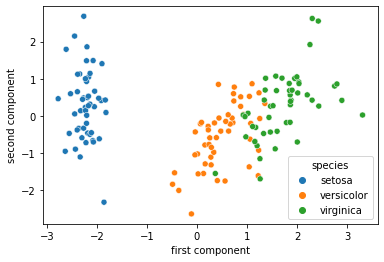

In [35]:
sns.scatterplot(x="first component", y="second component", hue="species", data=df_pc)

## 累積寄与率を描画する

### 寄与率を求める
sklearn.decomposition.PCA
- .explained_variance_ratio_属性で寄与率を取得

transformしたX_pcに用いるのではなく、fitだけしたPCAのオブジェクトに対して用いる。

In [46]:
from sklearn.decomposition import PCA
n_components = 4
pca = PCA(n_components=n_components).fit(X_scaled)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### 描画する
np.cumsum()を用いて、累積したarrayを作成する。

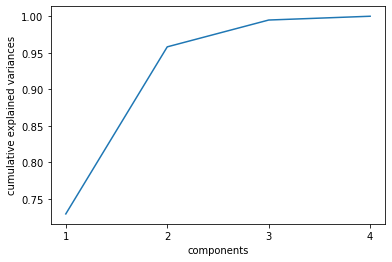

In [58]:
import matplotlib.pyplot as plt
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
# 主成分数は整数なので、x軸を整数だけにする
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.ylabel('cumulative explained variances')
plt.show()

主成分数は2が妥当である。

## PCAで分類器学習

### データの準備
標準化済みのX_train, X_testの作成。<br>
MNISTデータセット
- sklearn.datasets.fetch_openml('mnist_784')


読み込みに8分程度かかる。

In [79]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [80]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

学習データとテストデータを7:3に分割する

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0)

標準化を忘れずに

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### MNISTデータの画像再構成
.valuesでseriesをndarrayにし、28*28にreshapeする。

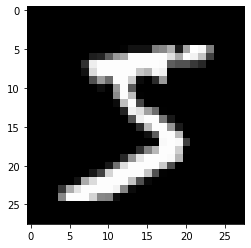

In [63]:
import matplotlib.pyplot as plt
im = mnist.data.iloc[0].values.reshape(28, 28)
plt.imshow(im, "gray")

### PCA
累積寄与率が95%になるようPCAする。

0 < n_components< 1の時、累積寄与率がn_componentsになるようPCAを行ってくれる。

X_testにはfitしないよう気を付ける。


In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [88]:
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [89]:
print(f"{X_train.shape[-1]} dimensions is reduced to {X_test_pc.shape[-1]} dimension by PCA")

784 dimensions is reduced to 323 dimension by PCA


### ロジスティック回帰

In [94]:
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression()
model_pca.fit(X_train_pc, y_train)
y_pred_pc = model_pca.predict(X_test_pc)
y_pred_pc

/Users/hiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['0', '4', '1', ..., '9', '0', '1'], dtype=object)

### スコア計算
簡単に、acccuracy_scoreを用いる

In [111]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_pred_pc)

0.9195238095238095

意味があるかは分からないが、練習のためROC曲線を描画。

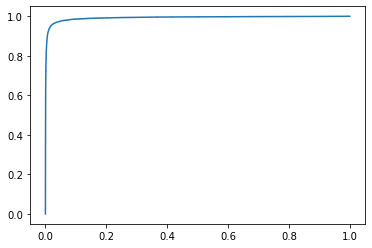

In [112]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
y_test_one_hot = label_binarize(y_test, classes=model_pca.classes_)
y_pred_proba = model_pca.predict_proba(X_test_pc)
fpr, tpr, _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
plt.plot(fpr, tpr)